In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from prophet import Prophet

Importing plotly failed. Interactive plots will not work.


In [2]:
# Carregar o dataset original de custos (não os dados agregados)
df = pd.read_csv("../data/raw/focus_simulated_dataset_focus_1.2.csv")

# Renomear as colunas para o padrão do Prophet (ds e y)
df.rename(columns={
    'ChargePeriodStart': 'ds',
    'EffectiveCost': 'y'
}, inplace=True)

# Converter a coluna 'ds' para o formato de data
df['ds'] = pd.to_datetime(df['ds'])

print("--- Dados carregados para detecção de anomalias ---")
print(df.head())

--- Dados carregados para detecção de anomalias ---
  InvoiceId         ds ChargePeriodEnd ProviderName   ServiceName  \
0  AWS-2011 2024-06-15      2024-06-16          AWS           EC2   
1  AWS-4351 2024-06-15      2024-06-16          AWS            S3   
2  AWS-9625 2024-06-15      2024-06-16          AWS        Lambda   
3  AZU-6015 2024-06-15      2024-06-16        Azure            VM   
4  AZU-7228 2024-06-15      2024-06-16        Azure  Blob Storage   

   ConsumedQuantity ConsumedUnit PricingCurrency  \
0                47        Hours             USD   
1                79        Hours             USD   
2                58        Hours             USD   
3                83        Hours             USD   
4                22        Hours             USD   

   PricingCurrencyListUnitPrice  PricingCurrencyContractedUnitPrice  \
0                          0.49                                0.42   
1                          1.43                                1.26   
2      

In [3]:
# Treinar o modelo
model = Prophet(
    growth='linear',
    seasonality_mode='additive'
)

# Agrupar os dados por dia para garantir que o índice seja único
df_daily = df.groupby('ds')['y'].sum().reset_index()

# Treinar o modelo com os dados diários agrupados
model.fit(df_daily)

# Fazer a previsão (o Prophet usa a previsão para encontrar anomalias nos dados históricos)
forecast = model.predict(df_daily)

# Combinar os dados originais (agregados) com a previsão
df_with_forecast = pd.merge(df_daily, forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']], on='ds')

print("--- Previsão combinada com os dados originais ---")
print(df_with_forecast.head())

06:55:29 - cmdstanpy - INFO - Chain [1] start processing
06:55:29 - cmdstanpy - INFO - Chain [1] done processing


--- Previsão combinada com os dados originais ---
          ds        y         yhat   yhat_lower   yhat_upper
0 2024-06-15  1567.61  2020.549062  1674.218346  2413.827696
1 2024-06-16  2074.67  2059.672079  1686.234221  2377.691630
2 2024-06-17  1428.84  2073.067753  1703.292868  2442.225226
3 2024-06-18  1910.09  1995.536818  1667.415976  2348.985715
4 2024-06-19  2135.78  1995.615403  1657.119115  2335.627337


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from prophet import Prophet


In [5]:
# Carregar o dataset original de custos (não os dados agregados)
df = pd.read_csv("../data/raw/focus_simulated_dataset_focus_1.2.csv")

# Renomear as colunas para o padrão do Prophet (ds e y)
df.rename(columns={
    'ChargePeriodStart': 'ds',
    'EffectiveCost': 'y'
}, inplace=True)

# Converter a coluna 'ds' para o formato de data
df['ds'] = pd.to_datetime(df['ds'])

print("--- Dados carregados para detecção de anomalias ---")
print(df.head())

--- Dados carregados para detecção de anomalias ---
  InvoiceId         ds ChargePeriodEnd ProviderName   ServiceName  \
0  AWS-2011 2024-06-15      2024-06-16          AWS           EC2   
1  AWS-4351 2024-06-15      2024-06-16          AWS            S3   
2  AWS-9625 2024-06-15      2024-06-16          AWS        Lambda   
3  AZU-6015 2024-06-15      2024-06-16        Azure            VM   
4  AZU-7228 2024-06-15      2024-06-16        Azure  Blob Storage   

   ConsumedQuantity ConsumedUnit PricingCurrency  \
0                47        Hours             USD   
1                79        Hours             USD   
2                58        Hours             USD   
3                83        Hours             USD   
4                22        Hours             USD   

   PricingCurrencyListUnitPrice  PricingCurrencyContractedUnitPrice  \
0                          0.49                                0.42   
1                          1.43                                1.26   
2      

In [6]:
# Treinar o modelo
model = Prophet(
    growth='linear',
    seasonality_mode='additive'
)

# Agrupar os dados por dia para garantir que o índice seja único
df_daily = df.groupby('ds')['y'].sum().reset_index()

# Treinar o modelo com os dados diários agrupados
model.fit(df_daily)

# Fazer a previsão (o Prophet usa a previsão para encontrar anomalias nos dados históricos)
forecast = model.predict(df_daily)

# Combinar os dados originais (agregados) com a previsão
df_with_forecast = pd.merge(df_daily, forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']], on='ds')

print("--- Previsão combinada com os dados originais ---")
print(df_with_forecast.head())

06:55:30 - cmdstanpy - INFO - Chain [1] start processing
06:55:30 - cmdstanpy - INFO - Chain [1] done processing


--- Previsão combinada com os dados originais ---
          ds        y         yhat   yhat_lower   yhat_upper
0 2024-06-15  1567.61  2020.549062  1657.229517  2382.068126
1 2024-06-16  2074.67  2059.672079  1691.217251  2410.099116
2 2024-06-17  1428.84  2073.067753  1710.161671  2430.271030
3 2024-06-18  1910.09  1995.536818  1635.932539  2347.387409
4 2024-06-19  2135.78  1995.615403  1629.749205  2348.103748


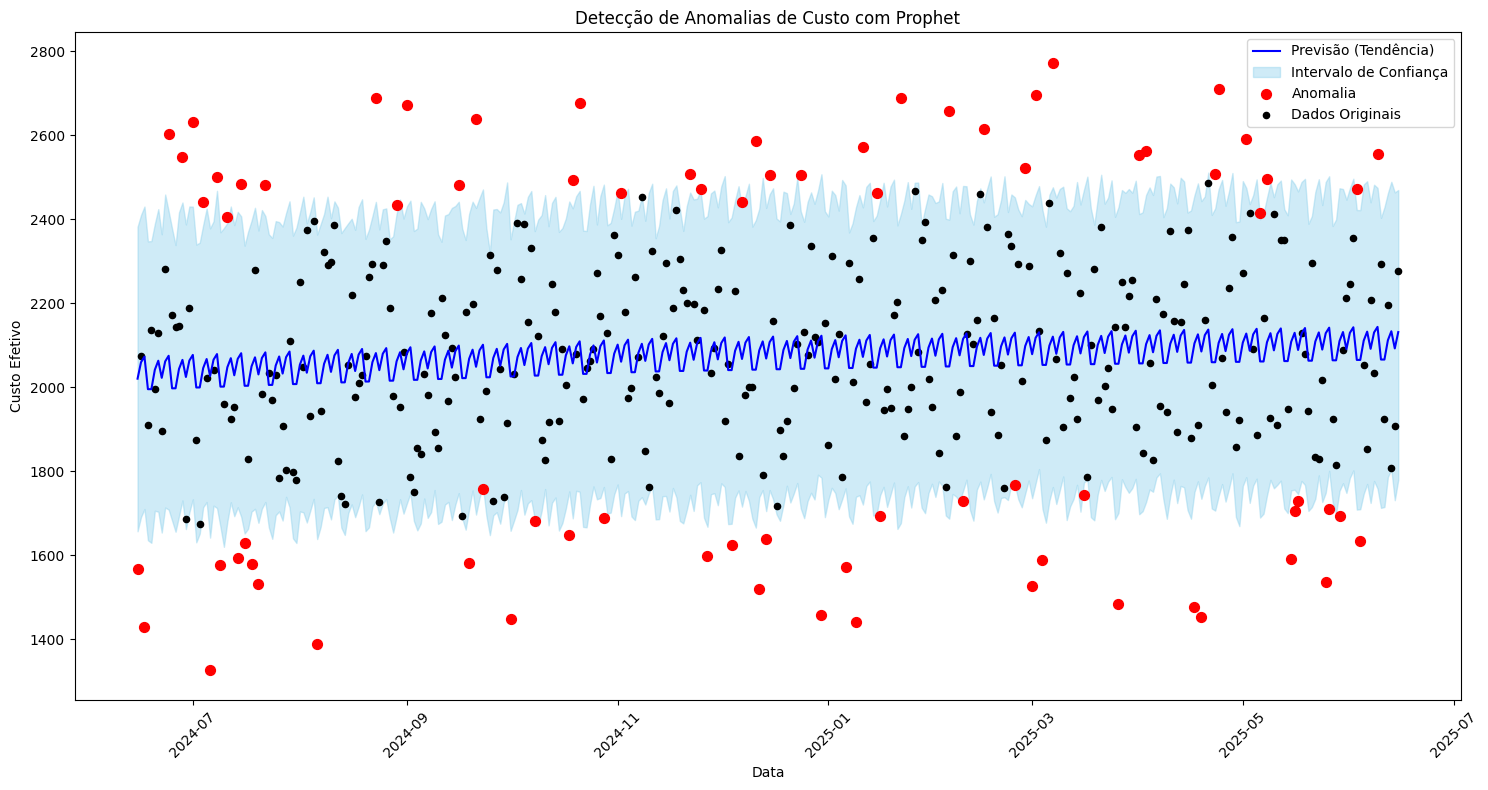

In [7]:
# Calcular se um ponto é uma anomalia
df_with_forecast['anomaly'] = df_with_forecast.apply(
    lambda row: 'anomaly' if row['y'] > row['yhat_upper'] or row['y'] < row['yhat_lower'] else 'normal', 
    axis=1
)

# Plotar os resultados
plt.figure(figsize=(15, 8))
plt.plot(df_with_forecast['ds'], df_with_forecast['yhat'], label='Previsão (Tendência)', color='blue')
plt.fill_between(
    df_with_forecast['ds'], 
    df_with_forecast['yhat_lower'], 
    df_with_forecast['yhat_upper'], 
    color='skyblue', 
    alpha=0.4, 
    label='Intervalo de Confiança'
)

# Plotar os pontos de anomalia
anomalies = df_with_forecast[df_with_forecast['anomaly'] == 'anomaly']
plt.scatter(anomalies['ds'], anomalies['y'], color='red', s=50, zorder=5, label='Anomalia')

# Plotar os pontos normais
normal = df_with_forecast[df_with_forecast['anomaly'] == 'normal']
plt.scatter(normal['ds'], normal['y'], color='black', s=20, label='Dados Originais')

plt.title('Detecção de Anomalias de Custo com Prophet')
plt.xlabel('Data')
plt.ylabel('Custo Efetivo')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [8]:
# Filtrar apenas as anomalias
anomalies_only = df_with_forecast[df_with_forecast['anomaly'] == 'anomaly']

# Salvar as anomalias detectadas
anomalies_only.to_csv("../data/processed/detected_anomalies.csv", index=False)
print("Anomalias detectadas salvas em 'data/processed/detected_anomalies.csv'.")

Anomalias detectadas salvas em 'data/processed/detected_anomalies.csv'.
